In [1]:
#Some imports:
#%pip install numpy
#%pip install scipy
#%pip install matplotlib
import sys
import numpy as np
from collections import defaultdict

from data import Data
from probability_model import ProbabilityModel
from poisson_gamma import PoissonGamma
from regime_model import RegimeModel
from multinomial_dirichlet import MultinomialDirichlet
from normal_normal_inverse_gamma import NormalNIG
from simulate_changepoint_data import *
import matplotlib.pyplot as plt

In [5]:
n=1000
lambda_cps=.1
seed=1
probability_models=[]
probability_models.append(MultinomialDirichlet(k=np.array([3,5],dtype=int),alpha=1))
probability_models.append(NormalNIG(p=3,alpha_beta=[1,.1],v=1))
tau,regimes,inclusion_vectors,xys=simulate(n,probability_models,seed=seed,lambda_cps=lambda_cps)

<multinomial_dirichlet.MultinomialDirichlet object at 0x12a4c0a90> {0: [array([0.34333348, 0.28679098, 0.36987554]), array([0.01529722, 0.11467862, 0.31454622, 0.27752888, 0.27794906])], 2: [array([0.21399185, 0.04098061, 0.74502754]), array([0.28951828, 0.3586162 , 0.17087917, 0.0708697 , 0.11011665])]}
<normal_normal_inverse_gamma.NormalNIG object at 0x127a78e10> {0: (array([ 0.07945227, -0.09447501, -0.55203932]), array([0.80768381, 0.25571282, 0.43357734])), 1: (array([ 0.41756864, -0.57760815, -0.07988813]), array([0.41140302, 0.63095708, 1.14561262]))}


In [6]:
# show the sizes of the x (time points) and y (data values) matrices generated for each probability model
for _ in range(len(xys)):
    x,y=xys[_]
    print(x.shape,y.shape)

(1000,) (2, 1000)
(1000,) (3, 1000)


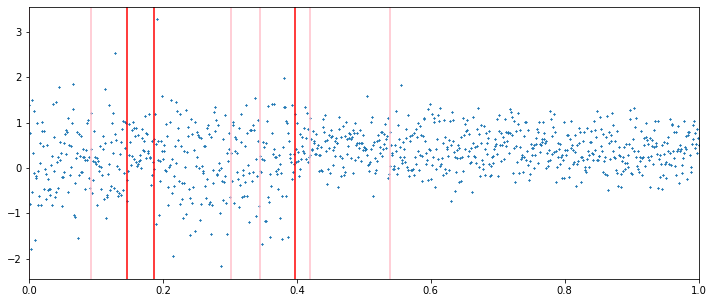

In [13]:
plt.figure(figsize=(12,5))
plt.autoscale(enable=True, axis='x', tight=True)
pm_index=1
x,y=xys[pm_index]
r=regimes[0]
for i in range(len(tau)):
    new_r=regimes[i+1]
    if inclusion_vectors[pm_index,new_r] and new_r!=r:
        plt.axvline(x=tau[i],color='red')
        r=new_r
    else:
        plt.axvline(x=tau[i],color='pink')

plt.scatter(x,y[0,],marker="x",s=1.5)
plt.show()